In [88]:
#Import Important Packages
import pandas as pd
import requests
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import linear_model

In [89]:
#GRP Nominal in USD
url_1='https://en.wikipedia.org/wiki/List_of_Indonesian_provinces_by_GRP_per_capita'
GRP=pd.read_html(url_1,skiprows=0)[0]

#Drop unnecessary columns
GRP.drop('Rank per capita',axis=1,inplace=True)
GRP.drop('Region',axis=1,inplace=True)
GRP.drop('GRP Nominal in USD',axis=1,inplace=True)
GRP.drop('Nominal per capitain IDR',axis=1,inplace=True)
GRP.drop('PPP per capitain USD',axis=1,inplace=True)
GRP.drop('GRP Nominal in IDR',axis=1,inplace=True)
GRP.drop('GRP PPP in USD',axis=1,inplace=True)

#remove billions and dollar sign in the column GRP Nominal in USD
GRP.rename(columns={'Nominal per capitain USD':'GRP'},inplace=True)
GRP['GRP']=GRP['GRP'].str.replace('$','')
GRP['GRP']=GRP['GRP'].str.replace(' billion','')
GRP['GRP']=GRP['GRP'].str.replace(',','')
GRP['GRP']=GRP['GRP'].astype(float)


#Disregard the first row since it's national GRP
GRP.drop(0,axis=0,inplace=True)

#Column GRP means the GRP Nominal in USD and in billions
GRP.head()

#Sort data alphabetically according to the provinces
GRP.sort_values(['Province'],ascending=True,axis=0,inplace=True)
print(GRP.head())
print(GRP.shape)

                   Province     GRP
29                     Aceh  2111.0
9                      Bali  3791.0
10  Bangka-Belitung Islands  3654.0
15                   Banten  3396.0
26                 Bengkulu  2345.0
(33, 2)


In [90]:
#National Exam Results
url_2='https://puspendik.kemdikbud.go.id/hasil-un/'

#The data is downloaded and uploaded to the jupyter lab and called back

Nat_exam=pd.read_csv('National_exam_2017-2018.csv')

Nat_exam.drop('Unnamed: 17',axis=1,inplace=True)

for i in range(4,18,2):
    Nat_exam.drop('Unnamed: '+str(i),axis=1,inplace=True)

#Rename the columns, where IL means Indonesian Language, NS means Natural Sciences, SS means Social Sciences
Nat_exam.rename(columns={'BAHASA':'Average_IL','IPA':'Average_NS','IPS':'Average_SS',
                         'KEAGAMAAN':'Average_Religion','NAMA PROVINSI':'Province',
                        'TOTAL':'Average_Total'},inplace=True)

#Drop the KATOLIK and PROTESTAN data, due to lack of data
Nat_exam.drop('KATOLIK',axis=1,inplace=True)
Nat_exam.drop('PROTESTAN',axis=1,inplace=True)

#Clean the data further
Nat_exam.drop(['NO','KODE'],axis=1,inplace=True)
Nat_exam.drop(0,axis=0,inplace=True)

#Since the provinces are in Indonesian langauges, change it into English
Nat_exam['Province']
data=['ignore','DKI Jakarta','West Java','Central Java','Yogyakarta','East Java','Aceh','North Sumatera',
     'West Sumatera','Riau','Jambi','South Sumatera','Lampung','West Kalimantan','Central Kalimantan',
     'South Kalimantan','East Kalimantan','North Sulawesi','Central Sulawesi','South Sulawesi',
      'Southeast Sulawesi','Maluku','Bali','West Nusa Tenggara','East Nusa Tenggara','Papua','Bengkulu',
      'North Maluku','Bangka-Belitung Islands','Gorontalo','Banten','Riau Islands','West Sulawesi',
      'West Papua','North Kalimantan',
     'National']
Column=['Province']
Nat_exam_eng=pd.DataFrame(data,columns=Column)

Nat_exam_eng.drop(0,axis=0,inplace=True)

for i in range(1,36):
    Nat_exam['Province'][i]=Nat_exam_eng['Province'][i]

#Drop North Kalimantan and make unknown value to its average_Total
#40.32 = 43.51*4 - 46.05 - 41.07 - 46.6
Nat_exam['Average_IL'][11]=40.32
    
Nat_exam['Average_Total']=Nat_exam.Average_Total.astype(float)
Nat_exam['Average_IL']=Nat_exam.Average_IL.astype(float)
Nat_exam['Average_NS']=Nat_exam.Average_NS.astype(float)
Nat_exam['Average_SS']=Nat_exam.Average_SS.astype(float)

for i in [21,27]:
    for j,k,l,m,n in [['Average_Religion','Average_Total','Average_IL','Average_NS','Average_SS']]:
        Nat_exam[j][i]=Nat_exam[k][i]*4-Nat_exam[l][i]-Nat_exam[m][i]-Nat_exam[n][i]

Nat_exam['Average_Religion']=Nat_exam.Average_Religion.astype(float)

Nat_exam.drop(34,axis=0,inplace=True)
Nat_exam.drop(35,axis=0,inplace=True)

#Sort data alphabetically according to the provinces
Nat_exam.sort_values(['Province'],ascending=True,axis=0,inplace=True)

print(Nat_exam.head())
print(Nat_exam.shape)

                   Province  Average_Total  Average_IL  Average_NS  \
6                      Aceh          39.22       46.58       40.12   
22                     Bali          55.62       50.84       60.87   
28  Bangka-Belitung Islands          49.76       48.67       52.22   
30                   Banten          46.89       55.52       50.63   
26                 Bengkulu          45.59       53.02       47.97   

    Average_SS  Average_Religion  
6        37.27             46.76  
22       48.57             52.40  
28       47.91             49.74  
30       43.88             46.85  
26       43.17             48.25  
(33, 6)


/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [91]:
#Join the two data
df_merge=Nat_exam.set_index('Province').join(GRP.set_index('Province'))
df_merge=df_merge.reset_index()
df_merge.head()

,Province,Average_Total,Average_IL,Average_NS,Average_SS,Average_Religion,GRP
0,Aceh,39.22,46.58,40.12,37.27,46.76,2111.0
1,Bali,55.62,50.84,60.87,48.57,52.40,3791.0
2,Bangka-Belitung Islands,49.76,48.67,52.22,47.91,49.74,3654.0
3,Banten,46.89,55.52,50.63,43.88,46.85,3396.0
4,Bengkulu,45.59,53.02,47.97,43.17,48.25,2345.0


No handles with labels found to put in legend.


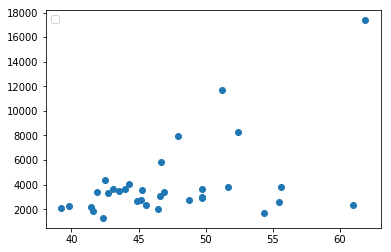

In [94]:
#Plotting each score_label with the GRP
x=np.asanyarray(df_merge[['Average_Total']])
y=np.asanyarray(df_merge['GRP'])
plt.scatter(x,y)
plt.legend(loc='upper left')

IndexError: invalid index to scalar variable.

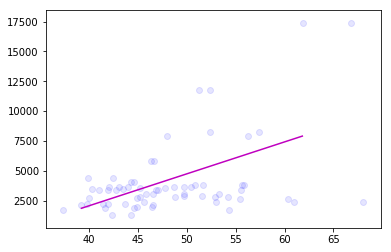

In [96]:
#Now Regressing every test scores with the Nominal GRP per Capita,
x=np.asanyarray(df_merge[['Average_Total']])
x1=np.asanyarray(df_merge[['Average_IL']])
x2=np.asanyarray(df_merge[['Average_NS']])
x3=np.asanyarray(df_merge[['Average_SS']])
x4=np.asanyarray(df_merge[['Average_Religion']])

regr=linear_model.LinearRegression()
regr1=linear_model.LinearRegression()
regr2=linear_model.LinearRegression()
regr3=linear_model.LinearRegression()
regr4=linear_model.LinearRegression()

regr.fit(x,y)
regr1.fit(x1,y)
regr2.fit(x2,y)
regr3.fit(x3,y)
regr4.fit(x4,y)

#Plotting every line
plt.scatter(x,y,color='blue',alpha=0.1)
XX=np.arange(x.min(),x.max(),0.1)
yy=regr.intercept_+regr.coef_[0]*XX
plt.plot(XX,yy,'-m',label='Total_Average')

plt.scatter(x1,y,color='blue',alpha=0.1)
XX1=np.arange(x1.min(),x1.max(),0.1)
yy1=regr1.intercept_+regr1.coef_[0]*XX1
plt.plot(XX1,yy1,'-r',label='Average_IL')

plt.scatter(x2,y,color='blue',alpha=0.1)
XX2=np.arange(x2.min(),x2.max(),0.1)
yy2=regr2.intercept_+regr2.coef_[0]*XX2
plt.plot(XX2,yy2,'-g',label='Average_NS')

plt.scatter(x3,y,color='blue',alpha=0.1)
XX3=np.arange(x3.min(),x3.max(),0.1)
yy3=regr3.intercept_+regr3.coef_[0]*XX3
plt.plot(XX3,yy3,'-y',label='Average_SS')

plt.scatter(x4,y,color='blue',alpha=0.1)
XX4=np.arange(x4.min(),x4.max(),0.1)
yy4=regr4.intercept_[0]+regr4.coef_[0]*XX4
plt.plot(XX4,yy4,'-b',label='Average_Religion')

plt.title('Average Score of Indonesia\'s National Exam in a province vs GRP of that province')
plt.legend(loc='upper left')
plt.xlabel('Total Average Score')
plt.ylabel('Nominal GRP per Capita in USD')
plt.figure(figsize=(50,40))

<Figure size 3600x2880 with 0 Axes>

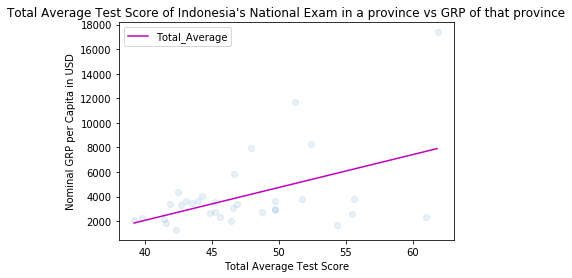

<Figure size 3600x2880 with 0 Axes>

In [85]:
#From the plot, the data is clear that the correlation between the two is positive.
#Linear regression for each of the line
x=np.asanyarray(df_merge[['Average_Total']])
y=np.asanyarray(df_merge['GRP'])
regr=linear_model.LinearRegression()
regr.fit(x,y)

#Total Average Test Score
plt.scatter(x,y,alpha=0.1)
XX=np.arange(x.min(),x.max(),0.1)
yy=regr.intercept_+regr.coef_[0]*XX
plt.plot(XX,yy,'-m',label='Total_Average')

plt.title('Total Average Test Score of Indonesia\'s National Exam in a province vs GRP of that province')
plt.legend(loc='upper left')
plt.xlabel('Total Average Test Score')
plt.ylabel('Nominal GRP per Capita in USD')
plt.figure(figsize=(50,40))

<Figure size 3600x2880 with 0 Axes>

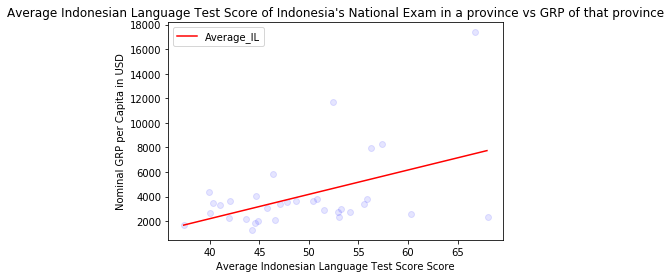

<Figure size 3600x2880 with 0 Axes>

In [87]:
#Average Indonesian Language Test Score
plt.scatter(x1,y,color='blue',alpha=0.1)
XX1=np.arange(x1.min(),x1.max(),0.1)
yy1=regr1.intercept_[0]+regr1.coef_[0]*XX1
plt.plot(XX1,yy1,'-r',label='Average_IL')

plt.title('Average Indonesian Language Test Score of Indonesia\'s National Exam in a province vs GRP of that province')
plt.legend(loc='upper left')
plt.xlabel('Average Indonesian Language Test Score Score')
plt.ylabel('Nominal GRP per Capita in USD')
plt.figure(figsize=(50,40))

<Figure size 3600x2880 with 0 Axes>

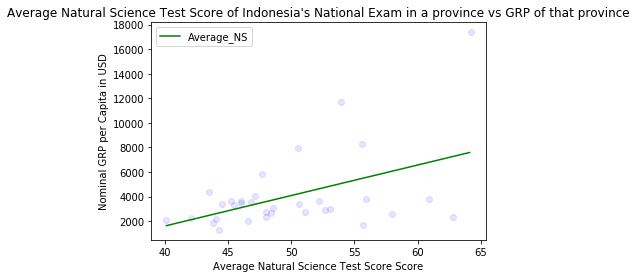

<Figure size 3600x2880 with 0 Axes>

In [36]:
#Average Natural Science Test Score
plt.scatter(x2,y,color='blue',alpha=0.1)
XX2=np.arange(x2.min(),x2.max(),0.1)
yy2=regr2.intercept_[0]+regr2.coef_[0]*XX2
plt.plot(XX2,yy2,'-g',label='Average_NS')

plt.title('Average Natural Science Test Score of Indonesia\'s National Exam in a province vs GRP of that province')
plt.legend(loc='upper left')
plt.xlabel('Average Natural Science Test Score Score')
plt.ylabel('Nominal GRP per Capita in USD')
plt.figure(figsize=(50,40))

<Figure size 3600x2880 with 0 Axes>

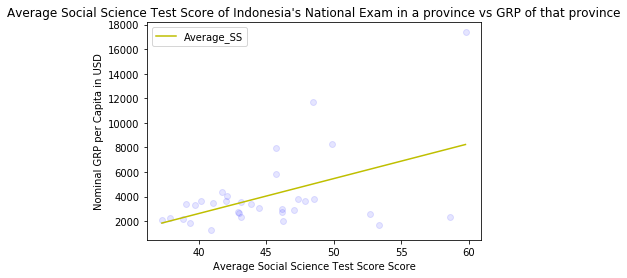

<Figure size 3600x2880 with 0 Axes>

In [37]:
#Average Social Science Test Score
plt.scatter(x3,y,color='blue',alpha=0.1)
XX3=np.arange(x3.min(),x3.max(),0.1)
yy3=regr3.intercept_[0]+regr3.coef_[0]*XX3
plt.plot(XX3,yy3,'-y',label='Average_SS')

plt.title('Average Social Science Test Score of Indonesia\'s National Exam in a province vs GRP of that province')
plt.legend(loc='upper left')
plt.xlabel('Average Social Science Test Score Score')
plt.ylabel('Nominal GRP per Capita in USD')
plt.figure(figsize=(50,40))

<Figure size 3600x2880 with 0 Axes>

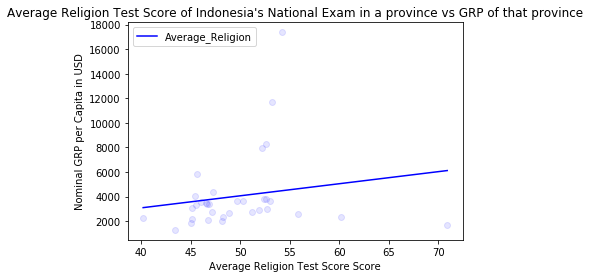

<Figure size 3600x2880 with 0 Axes>

In [38]:
#Average Religion Test Score
plt.scatter(x4,y,color='blue',alpha=0.1)
XX4=np.arange(x4.min(),x4.max(),0.1)
yy4=regr4.intercept_[0]+regr4.coef_[0]*XX4
plt.plot(XX4,yy4,'-b',label='Average_Religion')

plt.title('Average Religion Test Score of Indonesia\'s National Exam in a province vs GRP of that province')
plt.legend(loc='upper left')
plt.xlabel('Average Religion Test Score Score')
plt.ylabel('Nominal GRP per Capita in USD')
plt.figure(figsize=(50,40))

In [53]:
#Coefficients of each regression
Header=['Test_score Subjects', 'Coefficients']
coef=[['Average_Total',float(regr.coef_)],
['Average_IL',float(regr1.coef_)],
['Average_NS',float(regr2.coef_)],
['Average_SS',float(regr3.coef_)],
['Average_Religion',float(regr4.coef_)]]
coeff=pd.DataFrame(coef,columns=Header)
coeff

,Test_score Subjects,Coefficients
0,Average_Total,267.757111
1,Average_IL,198.099222
2,Average_NS,248.050901
3,Average_SS,284.123568
4,Average_Religion,98.251033
